In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
data = pd.read_csv('/content/Gold_data.csv',header=0, names=['Date','Price'])
data

,Date,Price
0,01/01/2016,2252.60
1,02/01/2016,2454.50
2,03/01/2016,2708.10
3,04/01/2016,2577.80
4,05/01/2016,2597.75
...,...,...
2177,17/12/2021,4394.40
2178,18/12/2021,4389.50
2179,19/12/2021,4389.50
2180,20/12/2021,4354.10


In [3]:
data = data.set_index('Date')

In [4]:
data.head()

,Price
Date,
01/01/2016,2252.60
02/01/2016,2454.50
03/01/2016,2708.10
04/01/2016,2577.80
05/01/2016,2597.75


In [5]:
data.tail()

,Price
Date,
17/12/2021,4394.4
18/12/2021,4389.5
19/12/2021,4389.5
20/12/2021,4354.1
21/12/2021,4346.5


In [6]:
data.shape

(2182, 1)

In [7]:
data.describe()

,Price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [8]:
data.nunique()

Price    1876
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 01/01/2016 to 21/12/2021
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1+ KB


In [10]:
data.isna().sum()

Price    0
dtype: int64

In [11]:
data.dtypes

Price    float64
dtype: object

# EDA

eda bullet points should be there bar charts 


(array([ 65., 780., 422.,  49., 187.,  35., 104., 378., 146.,  16.]),
 array([2252.6 , 2523.97, 2795.34, 3066.71, 3338.08, 3609.45, 3880.82,
        4152.19, 4423.56, 4694.93, 4966.3 ]),
 <a list of 10 Patch objects>)

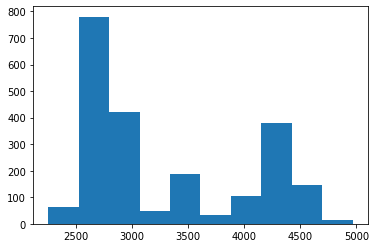

In [12]:
plt.hist(data['Price'])

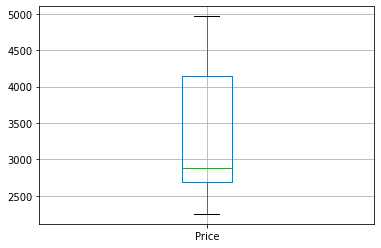

In [13]:
data.boxplot(column=["Price"])

# check trend in data

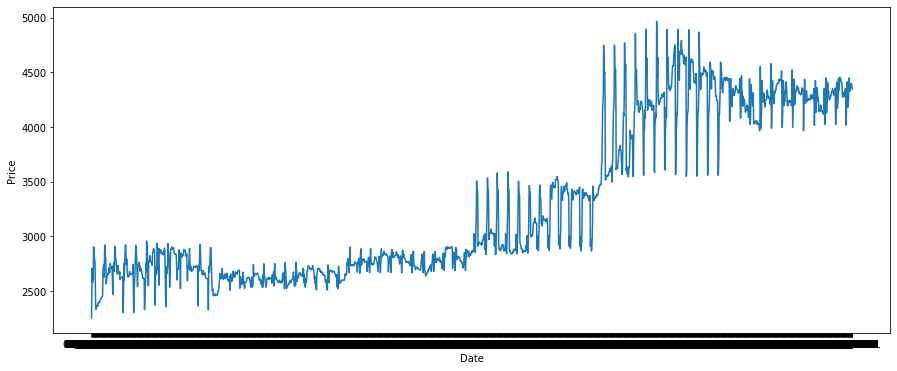

In [14]:
plt.figure(figsize=(15,6))
series1=sns.lineplot(x='Date',y='Price',data=data)
#plt.show(series1)


# resampling the data

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

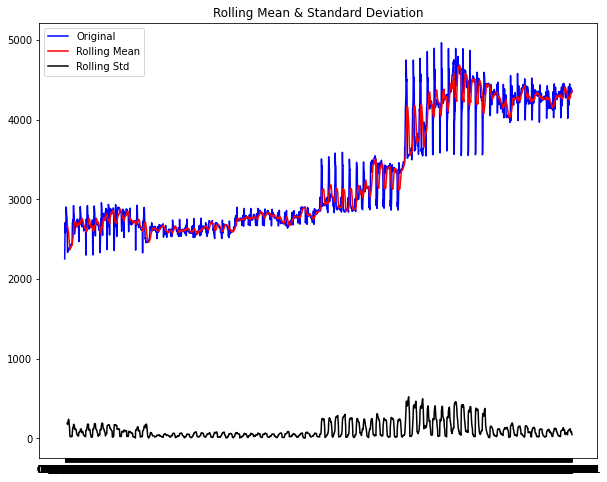

In [16]:
plt.figure(figsize = (10,8))
test_stationarity(data)
plt.show()

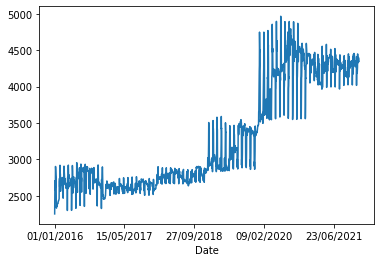

In [17]:
data.Price.plot()

<Figure size 1728x504 with 0 Axes>

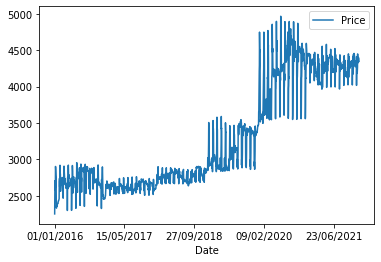

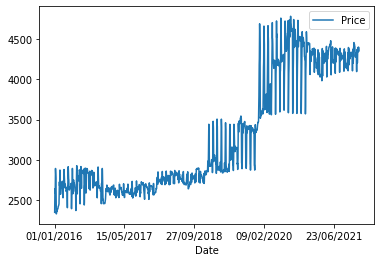

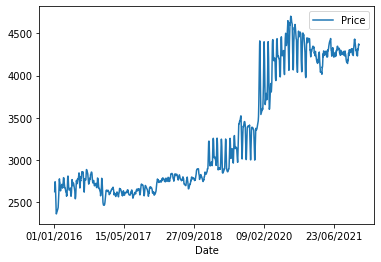

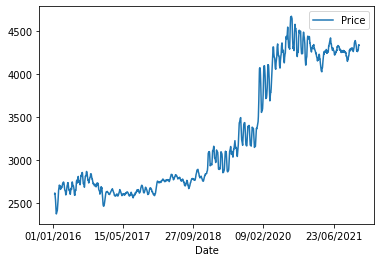

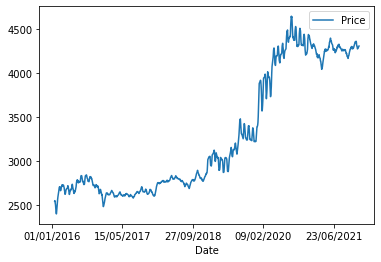

In [18]:
plt.figure(figsize=(24,7))
data.plot(label='org')
for i in range(2,24,6):
     data.rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Plotting Moving Average

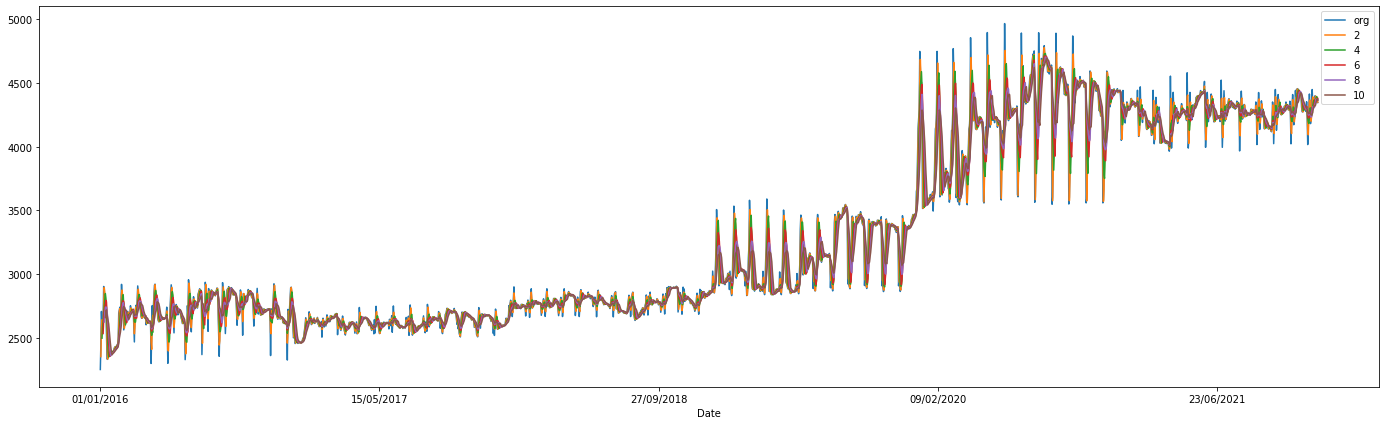

In [19]:
b=range(2,12,2)
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
for i in b:
    data['Price'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')           

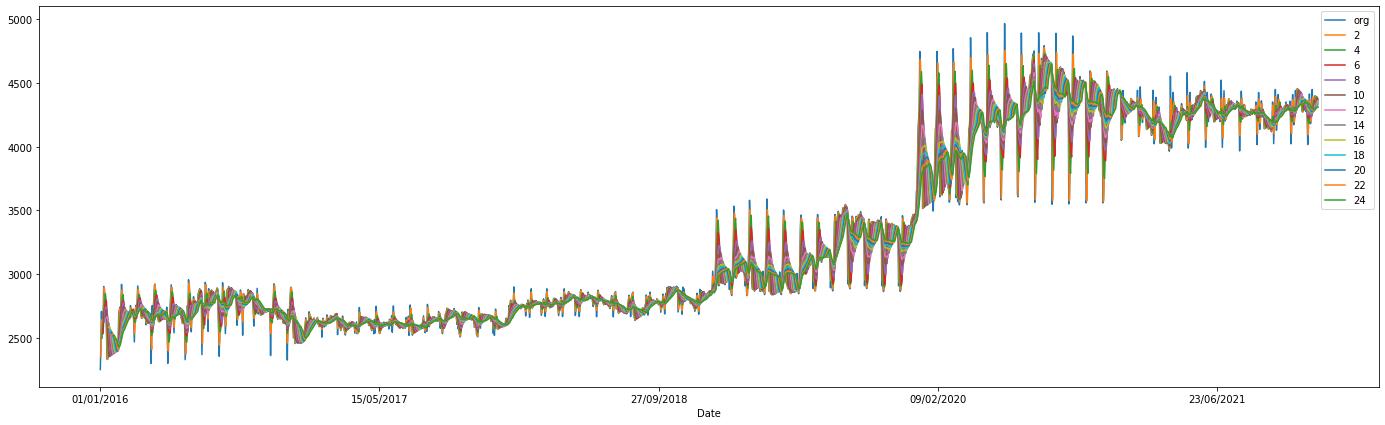

In [20]:
b=range(2,25,2)
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
for i in b:
    data['Price'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')  

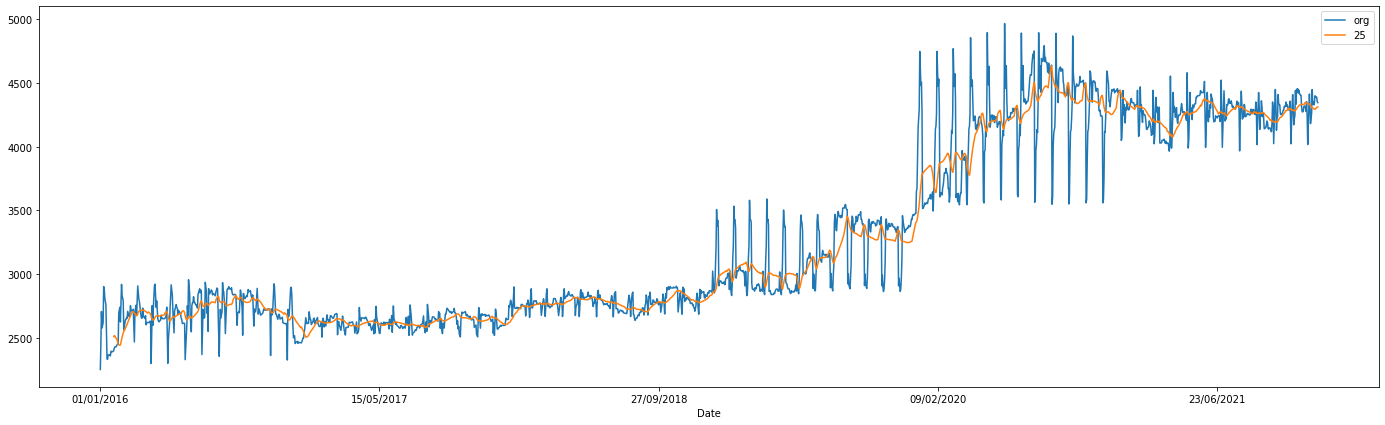

In [21]:

plt.figure(figsize=(24,7))
data.Price.plot(label='org')
data['Price'].rolling(25).mean().plot(label=str(25))
plt.legend(loc='best')  

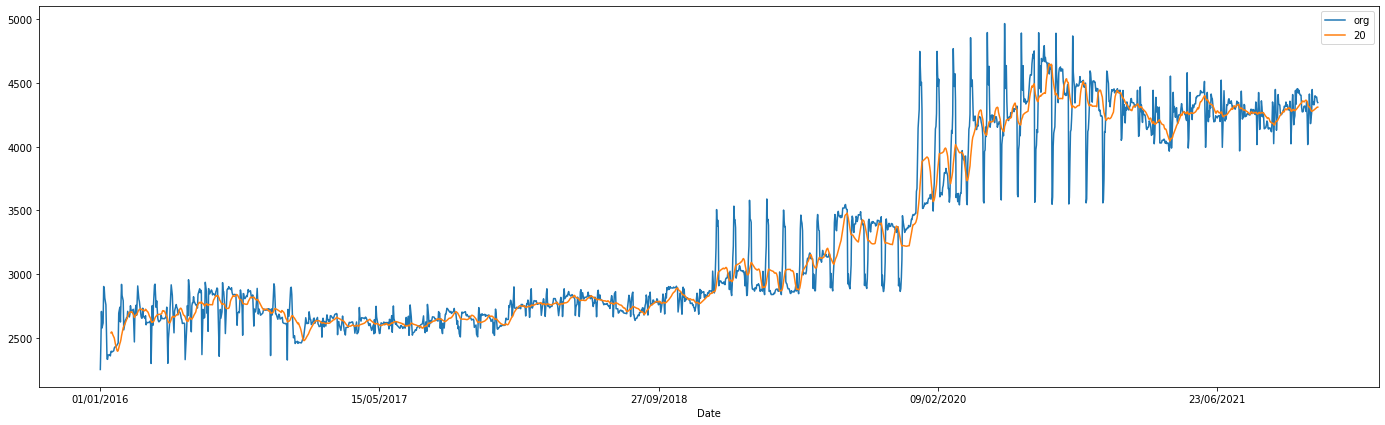

In [22]:
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
data['Price'].rolling(20).mean().plot(label=str(20))
plt.legend(loc='best')  

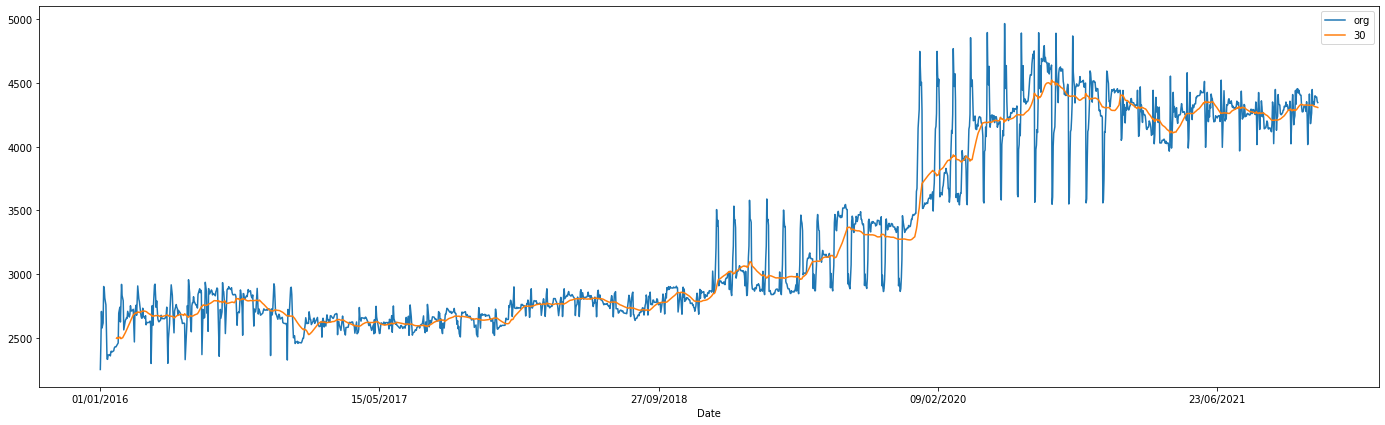

In [23]:
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
data['Price'].rolling(30).mean().plot(label=str(30))
plt.legend(loc='best')  

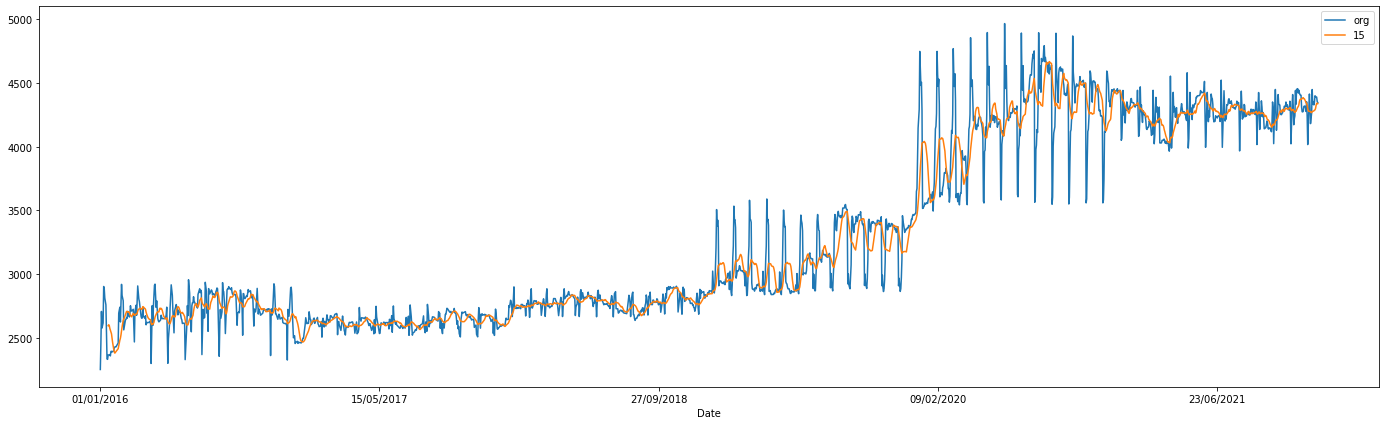

In [24]:
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
data['Price'].rolling(15).mean().plot(label=str(15))
plt.legend(loc='best')  

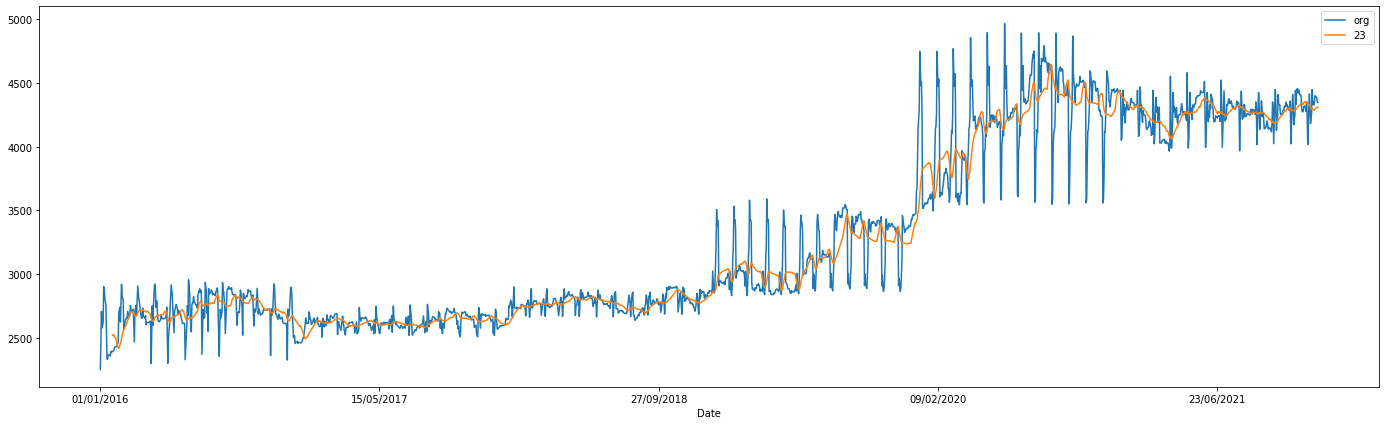

In [25]:
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
data['Price'].rolling(23).mean().plot(label=str(23))
plt.legend(loc='best')  

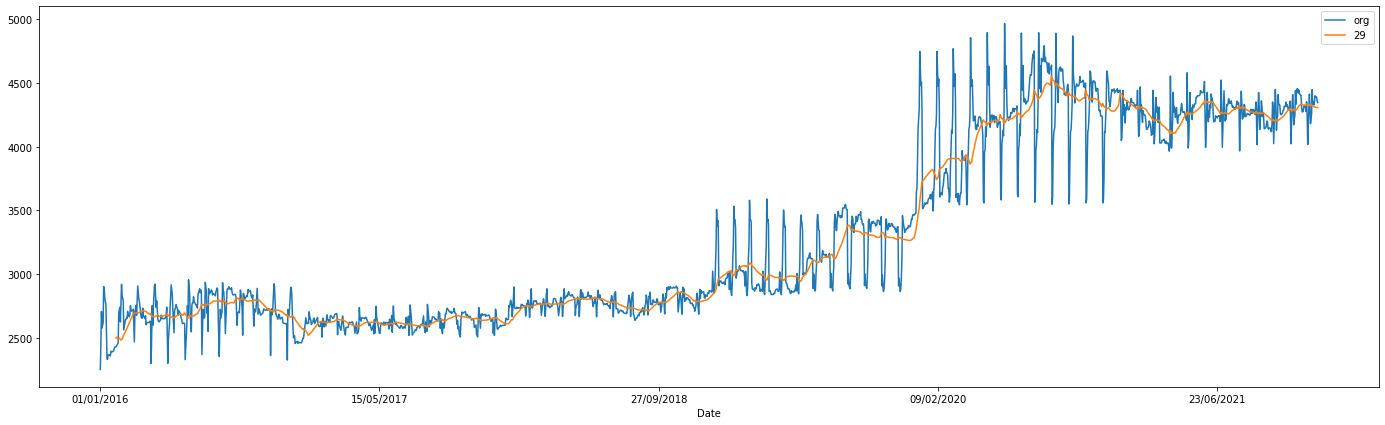

In [26]:
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
data['Price'].rolling(29).mean().plot(label=str(29))
plt.legend(loc='best')  

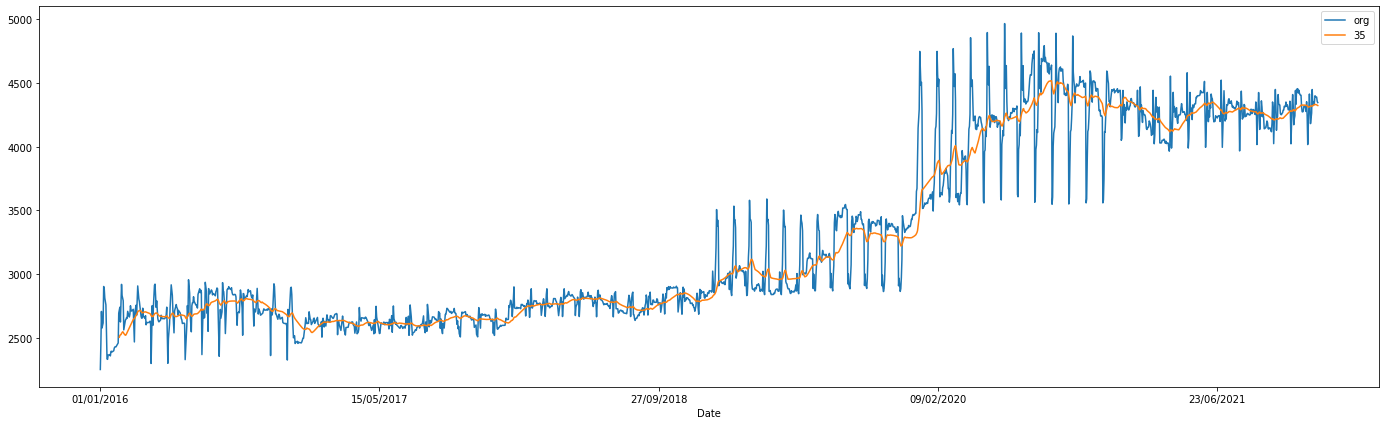

In [27]:
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
data['Price'].rolling(35).mean().plot(label=str(35))
plt.legend(loc='best')  

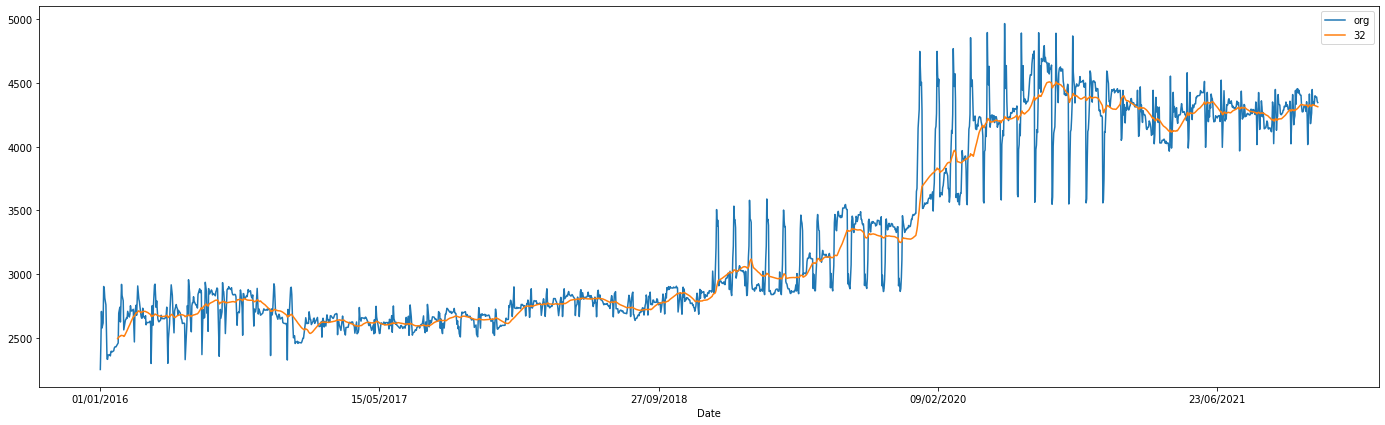

In [28]:
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
data['Price'].rolling(32).mean().plot(label=str(32))
plt.legend(loc='best') 

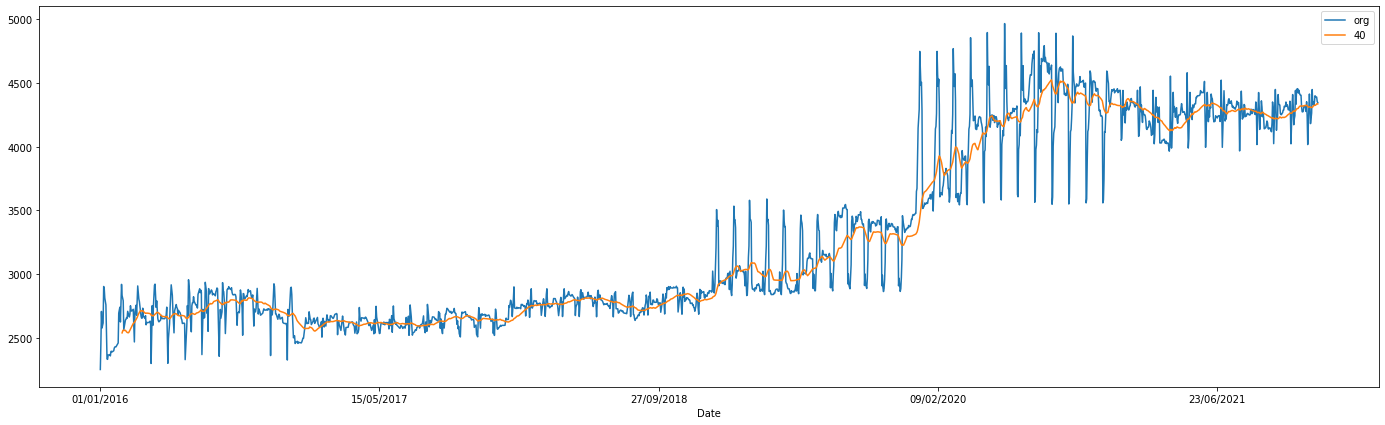

In [29]:
plt.figure(figsize=(24,7))
data.Price.plot(label='org')
data['Price'].rolling(40).mean().plot(label=str(40))
plt.legend(loc='best') 

# **Stationatirty of Data**

Trends

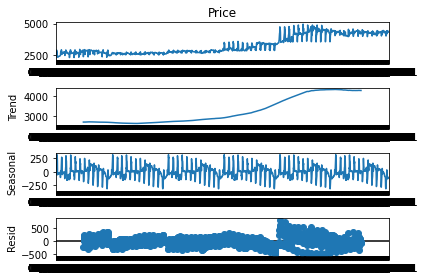

In [30]:
decompose_ts_add = seasonal_decompose(data.Price,period=365)
decompose_ts_add.plot()
plt.show()

# Train & Test Split

In [31]:
train = data['Price'][:int(len(data)*0.8)]
test = data['Price'][int(len(data)*0.8):]

In [32]:
train

Date
01/01/2016    2252.60
02/01/2016    2454.50
03/01/2016    2708.10
04/01/2016    2577.80
05/01/2016    2597.75
               ...   
06/10/2020    4221.50
07/10/2020    4341.10
08/10/2020    4869.10
09/10/2020    4586.40
10/10/2020    4519.30
Name: Price, Length: 1745, dtype: float64

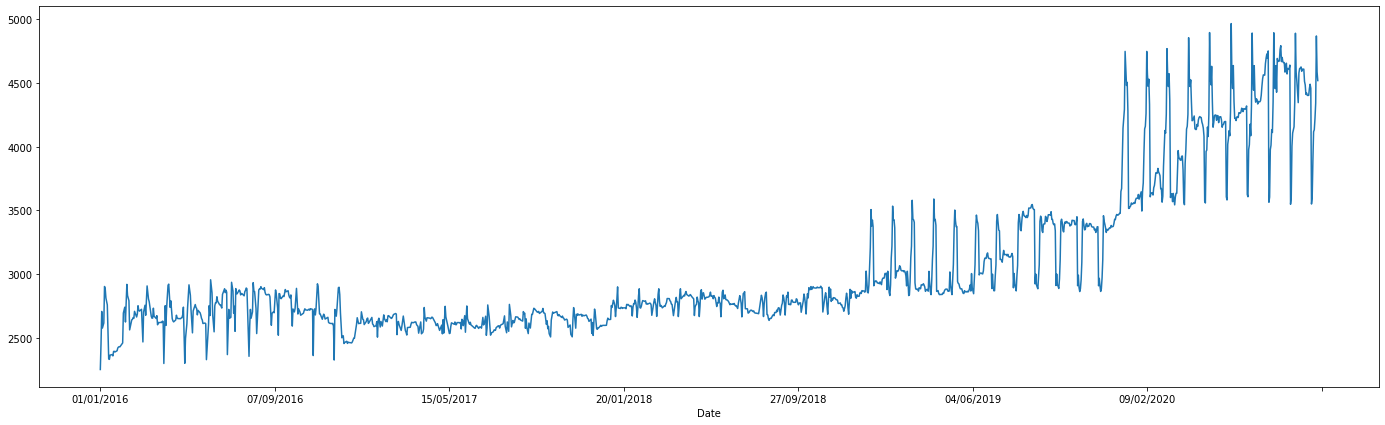

In [33]:
plt.figure(figsize=(24,7))
train.plot()

In [34]:
test

Date
11/10/2020    4473.6
12/10/2020    4343.3
13/10/2020    4460.7
14/10/2020    4473.4
15/10/2020    4493.3
               ...  
17/12/2021    4394.4
18/12/2021    4389.5
19/12/2021    4389.5
20/12/2021    4354.1
21/12/2021    4346.5
Name: Price, Length: 437, dtype: float64

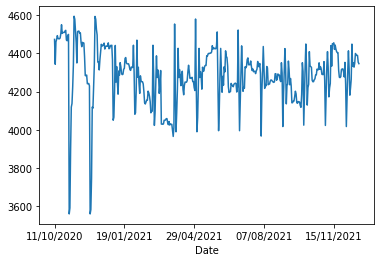

In [35]:
test.plot()

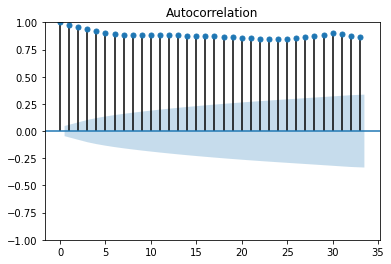

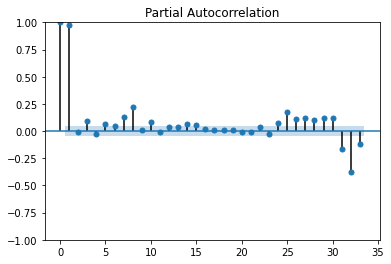

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train)

pacf_original = plot_pacf(train)

In [37]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train)
print(f'p-value: {adf_test[1]}')

p-value: 0.9896081308001691


**Transform to stationary: differencing**

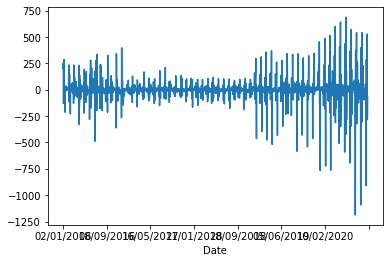

In [38]:
train_diff = train.diff().dropna()
train_diff.plot()

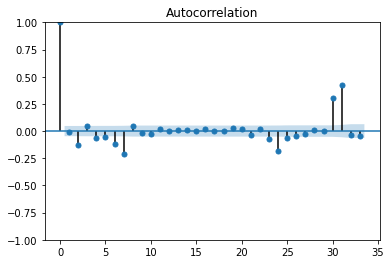

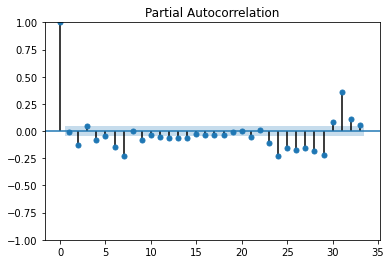

In [39]:
acf_diff = plot_acf(train_diff)

pacf_diff = plot_pacf(train_diff)

In [40]:
adf_test = adfuller(train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


# Model Building

**Determine ARIMA models parameters p, q**

In [41]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import pmdarima as pm
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(4, 1, 1), scoring_args={}, suppress_warnings=True)

In [43]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1745
Model:               SARIMAX(4, 1, 1)   Log Likelihood              -10629.595
Date:                Tue, 06 Dec 2022   AIC                          21273.189
Time:                        05:57:34   BIC                          21311.437
Sample:                             0   HQIC                         21287.330
                               - 1745                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3006      0.121      2.490      0.013       0.064       0.537
ar.L1          0.8754      0.021     41.264      0.000       0.834       0.917
ar.L2         -0.1404      0.028     -5.087      0.000      -0.194      -0.086
ar.L3          0.1589      0.028      5.718      0.000       0.104       0.213
ar.L4         -0.1688      0.022     -7.747      0.000      -0.212      -0.126
ma.L1         -0.9619      0.009   -104.016      0.000      -0.980      -0.944
sigma2      1.151e+04    129.406     88.961      0.000    1.13e+04    1.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):             43164.55
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               4.34   Skew:                            -1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(31,1,31))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1745
Model:               ARIMA(31, 1, 31)   Log Likelihood              -10202.698
Date:                Tue, 06 Dec 2022   AIC                          20531.396
Time:                        06:02:13   BIC                          20875.624
Sample:                             0   HQIC                         20658.666
                               - 1745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0995      1.389     -0.791      0.429      -3.822       1.623
ar.L2         -1.1569      0.898     -1.289      0.198      -2.916       0.603
ar.L3         -1.1206      1.207     -0.928      0.3

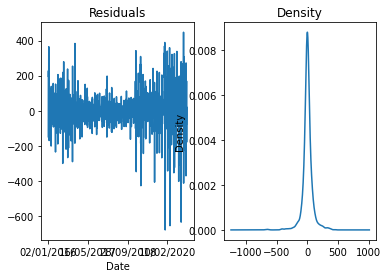

In [45]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

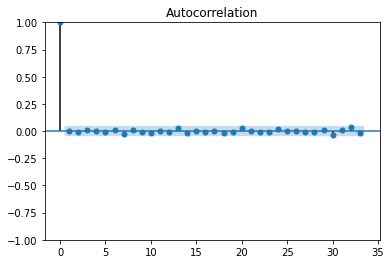

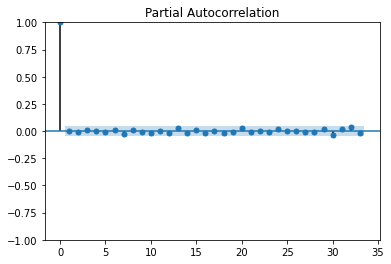

In [46]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


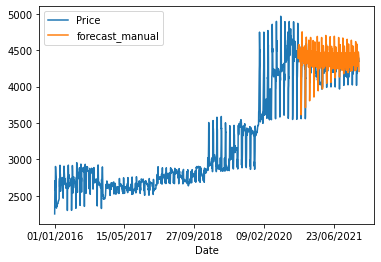

In [47]:
forecast_test = model_fit.forecast(len(test))

data['forecast_manual'] = [None]*len(train) + list(forecast_test)


data.plot()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


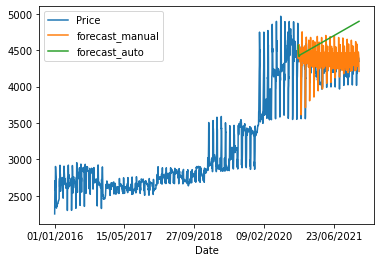

In [48]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))
data['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)
data.plot()


In [49]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test, forecast_test)
mape = mean_absolute_percentage_error(test, forecast_test)
rmse = np.sqrt(mean_squared_error(test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 150.1970530267491
mape - manual: 0.035535613681039184
rmse - manual: 194.6654693878396


In [50]:
index_30_days = pd.date_range(start='2022-01-01',end='2022-01-30',freq='D')
index_30_days

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30'],
              dtype='datetime64[ns]', freq='D')

In [51]:
forecast_predict = model_fit.forecast(len(index_30_days))
forecast_predict


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1745    4508.462075
1746    4385.309028
1747    4444.356797
1748    4560.559070
1749    4511.732812
1750    4575.842943
1751    4521.191177
1752    4564.500553
1753    4552.237038
1754    4504.164922
1755    4471.478829
1756    4458.482834
1757    4387.083207
1758    4338.057237
1759    4429.258061
1760    4527.801779
1761    4443.423454
1762    4466.312940
1763    4467.290094
1764    4497.633448
1765    4191.321107
1766    3613.951179
1767    3812.596211
1768    4084.648987
1769    4196.894513
1770    4310.668801
1771    4292.298180
1772    4552.874969
1773    4751.932651
1774    4546.749036
Name: predicted_mean, dtype: float64

In [52]:
forecast_test = forecast_test.rename("Prediction")
gold_fcast = forecast_test.to_frame()
gold_fcast.rename_axis("Date", inplace=True)
gold_fcast.reset_index(inplace=True)



In [53]:
forecast_test

1745    4508.462075
1746    4385.309028
1747    4444.356797
1748    4560.559070
1749    4511.732812
           ...     
2177    4461.838010
2178    4439.861117
2179    4416.760970
2180    4305.896226
2181    4209.483594
Name: Prediction, Length: 437, dtype: float64

In [54]:
gold_fcast.head(30)


,Date,Prediction
0,1745,4508.462075
1,1746,4385.309028
2,1747,4444.356797
3,1748,4560.559070
4,1749,4511.732812
5,1750,4575.842943
6,1751,4521.191177
7,1752,4564.500553
8,1753,4552.237038
9,1754,4504.164922


# fbprophet

In [55]:
!pip install prophet --q # for fbprophet

In [56]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [57]:
df = pd.read_csv('/content/Gold_data.csv',header=0, names=['ds','y'])
df

,ds,y
0,01/01/2016,2252.60
1,02/01/2016,2454.50
2,03/01/2016,2708.10
3,04/01/2016,2577.80
4,05/01/2016,2597.75
...,...,...
2177,17/12/2021,4394.40
2178,18/12/2021,4389.50
2179,19/12/2021,4389.50
2180,20/12/2021,4354.10


In [58]:
df = df.set_index('ds')

In [59]:
prophet_df = df.copy()
prophet_df.reset_index(inplace=True)
prophet_df.columns=['ds','y']
prophet_df.head()

,ds,y
0,01/01/2016,2252.60
1,02/01/2016,2454.50
2,03/01/2016,2708.10
3,04/01/2016,2577.80
4,05/01/2016,2597.75


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 01/01/2016 to 21/12/2021
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1+ KB


In [61]:
# train test split data
prophet_train_df = prophet_df.iloc[:-435]
prophet_test_df = prophet_df.iloc[-435:]

In [62]:
prophet_train_df

,ds,y
0,01/01/2016,2252.60
1,02/01/2016,2454.50
2,03/01/2016,2708.10
3,04/01/2016,2577.80
4,05/01/2016,2597.75
...,...,...
1742,08/10/2020,4869.10
1743,09/10/2020,4586.40
1744,10/10/2020,4519.30
1745,11/10/2020,4473.60


In [63]:
prophet_model = Prophet()
prophet_model.fit(prophet_train_df) #fit training data to model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg007r5q9/s1kac18b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg007r5q9/gbku4pps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91909', 'data', 'file=/tmp/tmpg007r5q9/s1kac18b.json', 'init=/tmp/tmpg007r5q9/gbku4pps.json', 'output', 'file=/tmp/tmpg007r5q9/prophet_modelqcobl1jx/prophet_model-20221206060220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:02:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:02:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [64]:
future = prophet_model.make_future_dataframe(periods=435, freq='D')
prophet_predictions = prophet_model.predict(future)

In [70]:
prophet_predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2177,2022-02-14,6097.858267,4453.227781,7687.671465,4522.182996,7747.034024,-58.838343,-58.838343,-58.838343,0.124077,0.124077,0.124077,-58.962420,-58.962420,-58.962420,0.0,0.0,0.0,6039.019924
2178,2022-02-15,6101.002051,4492.755418,7709.374864,4521.401740,7754.676838,-52.545434,-52.545434,-52.545434,0.606151,0.606151,0.606151,-53.151586,-53.151586,-53.151586,0.0,0.0,0.0,6048.456616
2179,2022-02-16,6104.145835,4422.175253,7714.819106,4515.244928,7762.992598,-48.031995,-48.031995,-48.031995,-0.433829,-0.433829,-0.433829,-47.598166,-47.598166,-47.598166,0.0,0.0,0.0,6056.113840
2180,2022-02-17,6107.289618,4450.025345,7759.467753,4509.088117,7772.046339,-41.013282,-41.013282,-41.013282,1.352358,1.352358,1.352358,-42.365640,-42.365640,-42.365640,0.0,0.0,0.0,6066.276337
2181,2022-02-18,6110.433402,4469.848029,7760.254297,4502.931306,7781.100080,-36.605785,-36.605785,-36.605785,0.908465,0.908465,0.908465,-37.514249,-37.514249,-37.514249,0.0,0.0,0.0,6073.827618


In [66]:
plot_plotly(prophet_model, prophet_predictions)

In [67]:
prophet_train_df['prophet_train_pred'] = prophet_predictions.iloc[:-435]['yhat']
prophet_test_df['prophet_test_pred'] = prophet_predictions.iloc[-435:]['yhat']

In [68]:
print('Train RMSE:',mean_squared_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred'])**0.5)
print('Test RMSE:',mean_squared_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred'])**0.5)
print('Train MAPE:',mean_absolute_percentage_error(prophet_train_df['y'], prophet_train_df['prophet_train_pred']))
print('Test MAPE:',mean_absolute_percentage_error(prophet_test_df['y'], prophet_test_df['prophet_test_pred']))

Train RMSE: 180.64702779300987
Test RMSE: 1205.4977123555539
Train MAPE: 0.03059536760962061
Test MAPE: 0.26269086485262855
